## 1 Preprocesamiento 

In [2]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

### 1.1 Cargar datos y definir variables categóricas

In [3]:

# Cargar CSV
df = pd.read_csv("JunteDatos.csv")

In [4]:
print(df['asma'].unique())


[0]


In [5]:
# Definir columnas ordinales y sus órdenes
ordinal_cols = ['actividad_fisica', 'nivel_educativo', 'estado_civil',
                'ocupacion', 'region', 'asma', 'sexo']

ordenes = [
    ['Baja', 'Moderada', 'Alta'],  # actividad_fisica
    ['Primaria', 'Secundaria', 'Universitaria', 'Posgrado'],  # nivel_educativo
    ['Soltero', 'Casado', 'Divorciado', 'Viudo'],  # estado_civil
    ['Desempleado', 'Empleado', 'Autónomo', 'Jubilado'],  # ocupacion
    ['Norte', 'Centro', 'Este', 'Oeste', 'Sur'],  # region
    ['0', 'Baja', 'Moderada', 'Alta'],  # asma
    ['F', 'M'],  # sexo
]

# 🧼 Aseguramos que todas las columnas estén como string
for col in ordinal_cols:
    df[col] = df[col].astype(str).str.strip()

# ⚙️ Codificar con OrdinalEncoder
encoder = OrdinalEncoder(categories=ordenes)
df[ordinal_cols] = encoder.fit_transform(df[ordinal_cols])


### 1.2 Normalización de variables numericas 

In [6]:
from sklearn.preprocessing import StandardScaler

# Seleccionamos las columnas numéricas que queremos normalizar
numeric_cols = [
    'glucosa', 'colesterol', 'trigliceridos', 'hemoglobina',
    'leucocitos', 'plaquetas', 'creatinina', 'ingresos_mensuales',
    'gastos_salud', 'edad'
]

# Normalizamos
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


### 1.3 Detección y tratamiento de valores atípicos con IQR

In [7]:
# Usamos z-score para detectar outliers
import numpy as np

z_scores = np.abs((df[numeric_cols] - df[numeric_cols].mean()) / df[numeric_cols].std())

# Establecemos un umbral, por ejemplo 3
outliers = (z_scores > 3)

# Podemos marcar cuántos outliers hay por columna
print(outliers.sum())

# Opcional: eliminar filas con outliers extremos
df = df[(z_scores < 3).all(axis=1)]


glucosa               102
colesterol            103
trigliceridos         119
hemoglobina           134
leucocitos            109
plaquetas             159
creatinina            144
ingresos_mensuales     70
gastos_salud          208
edad                    0
dtype: int64


### 1.4 Eliminar (o imputar) valores nulos generados por outliers

In [8]:
# Comprobamos si hay nulos
print(df.isnull().sum())

# Rellenamos con media, moda o estrategia según la columna
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].mean(), inplace=True)


paciente_id                0
glucosa                    0
colesterol                 0
trigliceridos              0
hemoglobina                0
leucocitos                 0
plaquetas                  0
creatinina                 0
diabetes                   0
hipertension               0
obesidad                   0
cancer                     0
enfermedad_cardiaca        0
asma                       0
epoc                       0
ingresos_mensuales         0
gastos_salud               0
seguro_salud               0
deudas                     0
tipo_empleo            48869
ayudas_publicas            0
fumador                    0
alcohol                    0
actividad_fisica           0
vive                       0
mut_BRCA1                  0
mut_TP53                   0
mut_EGFR                   0
mut_KRAS                   0
mut_PIK3CA                 0
mut_ALK                    0
mut_BRAF                   0
edad                       0
sexo                       0
estado_civil  

C:\Users\aserr\AppData\Local\Temp\ipykernel_36708\1284652134.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [9]:
df.drop('tipo_empleo', axis=1, inplace=True)


In [10]:
df

,paciente_id,glucosa,colesterol,trigliceridos,hemoglobina,leucocitos,plaquetas,creatinina,diabetes,hipertension,...,mut_ALK,mut_BRAF,edad,sexo,estado_civil,nivel_educativo,ocupacion,region,pais_nacimiento,codigo_postal
0,P1000000,1.125931,1.116180,0.518919,-0.262543,-0.924342,0.202956,-0.323535,1,1,...,0,1,0.750106,0.0,3.0,1.0,1.0,1.0,Indonesia,98471
1,P1000001,-1.549388,-1.768373,-1.357231,0.177002,-0.083060,0.709850,-0.883740,0,0,...,0,1,-1.028843,1.0,0.0,2.0,2.0,4.0,Brazil,23903
2,P1000002,-0.436864,-0.699218,-2.059947,-0.742047,0.481094,-0.116266,2.570857,0,0,...,0,0,1.711700,1.0,3.0,0.0,0.0,0.0,Saint Pierre and Miquelon,20094
3,P1000003,-0.258148,0.287809,-0.946194,-0.552243,1.490633,-0.122279,1.030293,1,0,...,0,0,1.182823,1.0,3.0,1.0,2.0,1.0,Indonesia,55575
4,P1000004,-1.940861,-1.565293,-2.566843,-1.161613,1.134325,-0.389633,-0.743689,0,0,...,0,0,-0.740365,0.0,0.0,3.0,2.0,0.0,Chile,20826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,P1049995,0.452072,-0.436782,-1.487405,0.906248,1.084838,-0.400908,-0.556954,0,0,...,0,0,-1.557720,1.0,1.0,2.0,0.0,4.0,Estonia,8356
49996,P1049996,-0.490247,-1.035569,0.338764,-0.662130,-0.934239,0.179152,-0.510270,0,0,...,0,0,-0.884604,0.0,1.0,3.0,1.0,3.0,Albania,2946
49997,P1049997,-0.992353,-0.593572,0.411497,-0.572223,0.223761,0.183913,0.283354,0,0,...,0,1,-0.355727,1.0,2.0,1.0,3.0,0.0,Austria,89529
49998,P1049998,-0.681341,-0.310231,-0.194988,0.286888,1.441146,0.474068,0.843558,0,1,...,0,0,0.125070,1.0,0.0,3.0,3.0,1.0,Saudi Arabia,13708


In [11]:
print(df['pais_nacimiento'].unique())


['Indonesia' 'Brazil' 'Saint Pierre and Miquelon' 'Chile' 'Cuba'
 'American Samoa' 'Montenegro' 'Cameroon' 'Slovenia' 'Greenland' 'China'
 'Somalia' 'Senegal' 'Korea' 'Palau' 'Swaziland' 'Antigua and Barbuda'
 'Holy See (Vatican City State)' 'Netherlands' 'Equatorial Guinea' 'Samoa'
 'Montserrat' 'San Marino' 'Cayman Islands' 'Malta' 'Tuvalu' 'Benin'
 'United States of America' 'Bahamas' 'Cape Verde' 'Kazakhstan'
 'French Guiana' 'Switzerland' "Cote d'Ivoire" 'Azerbaijan' 'Timor-Leste'
 'Gibraltar' 'Vanuatu' 'Malawi' 'Saint Vincent and the Grenadines'
 'Algeria' 'France' 'Honduras' 'Nigeria' 'Turkmenistan' 'Isle of Man'
 'Fiji' 'Singapore' 'Kenya' 'Sweden' 'Qatar' 'Ethiopia' 'Panama' 'Gambia'
 'Liechtenstein' 'Finland' 'Serbia' 'Iceland' 'Syrian Arab Republic'
 'Australia' 'Greece'
 'British Indian Ocean Territory (Chagos Archipelago)'
 'Trinidad and Tobago' 'Guadeloupe' 'Dominica' 'Sierra Leone'
 'Afghanistan' 'Canada' 'Israel' 'French Polynesia' 'Mongolia' 'Congo'
 'Ghana' 'Portugal'

In [12]:
# Listas de países por continente
africa = [
    'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
    'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad', 'Comoros',
    'Congo', "Cote d'Ivoire", 'Djibouti', 'Egypt', 'Equatorial Guinea',
    'Eritrea', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea',
    'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libyan Arab Jamahiriya',
    'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Mayotte',
    'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Reunion',
    'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone',
    'Somalia', 'South Africa', 'Sudan', 'Swaziland', 'Tanzania', 'Togo',
    'Tunisia', 'Uganda', 'Western Sahara', 'Zambia', 'Zimbabwe', 'British Indian Ocean Territory (Chagos Archipelago)', 'Saint Helena'
]
america = [
    'Antigua and Barbuda', 'Argentina', 'Bahamas', 'Barbados', 'Belize',
    'Bermuda', 'Bolivia', 'Brazil', 'Canada', 'Cayman Islands', 'Chile',
    'Colombia', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic',
    'Ecuador', 'El Salvador', 'French Guiana', 'Grenada', 'Guadeloupe',
    'Guatemala', 'Guyana', 'Haiti', 'Honduras', 'Jamaica', 'Martinique',
    'Mexico', 'Montserrat', 'Nicaragua', 'Panama', 'Paraguay', 'Peru',
    'Puerto Rico', 'Saint Barthelemy', 'Saint Kitts and Nevis',
    'Saint Lucia', 'Saint Martin', 'Saint Pierre and Miquelon',
    'Saint Vincent and the Grenadines', 'Suriname', 'Trinidad and Tobago',
    'Turks and Caicos Islands', 'United States of America',
    'Uruguay', 'Venezuela', 'British Virgin Islands', 'United States Virgin Islands', 
    'Greenland', 'United States Minor Outlying Islands', 'Netherlands Antilles', 'Aruba', 'Falkland Islands (Malvinas)', 'Anguilla'
]
asia = [
    'Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan',
    'Brunei Darussalam', 'Cambodia', 'China', 'Cyprus', 'Georgia', 'India',
    'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan',
    'Korea', 'Kuwait', 'Kyrgyz Republic', "Lao People's Democratic Republic",
    'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal',
    'Oman', 'Pakistan', 'Palestinian Territory', 'Philippines', 'Qatar',
    'Saudi Arabia', 'Singapore', 'Sri Lanka', 'Syrian Arab Republic',
    'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan',
    'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen', 'Taiwan', 'Hong Kong', 'Macao'
]
europa = [
    'Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina',
    'Bulgaria', 'Croatia', 'Czech Republic', 'Denmark', 'Estonia', 'Faroe Islands',
    'Finland', 'France', 'Germany', 'Gibraltar', 'Greece', 'Guernsey', 'Holy See (Vatican City State)',
    'Hungary', 'Iceland', 'Ireland', 'Isle of Man', 'Italy', 'Jersey', 'Latvia',
    'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco',
    'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal',
    'Romania', 'Russian Federation', 'San Marino', 'Serbia', 'Slovakia (Slovak Republic)',
    'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom'
]
oceania = [
    'American Samoa', 'Australia', 'Christmas Island', 'Cocos (Keeling) Islands',
    'Cook Islands', 'Fiji', 'French Polynesia', 'Guam', 'Kiribati', 'Marshall Islands',
    'Micronesia', 'Nauru', 'New Caledonia', 'New Zealand', 'Niue', 'Norfolk Island',
    'Northern Mariana Islands', 'Palau', 'Papua New Guinea', 'Pitcairn Islands',
    'Samoa', 'Solomon Islands', 'Tokelau', 'Tonga', 'Tuvalu', 'Vanuatu',
    'Wallis and Futuna'
]
antarctica = [
    'Antarctica (the territory South of 60 deg S)',
    'Bouvet Island (Bouvetoya)',
    'French Southern Territories',
    'Heard Island and McDonald Islands',
    'South Georgia and the South Sandwich Islands',
    'Svalbard & Jan Mayen Islands'
]

# Función para obtener continente
def obtener_continente(pais):
    if pais in africa:
        return 'África'
    elif pais in america:
        return 'América'
    elif pais in asia:
        return 'Asia'
    elif pais in europa:
        return 'Europa'
    elif pais in oceania:
        return 'Oceanía'
    elif pais in antarctica:
        return 'Antártida'
    else:
        return 'Desconocido'

# Aplicar la función a la columna 'pais_nacimiento' y crear la nueva columna 'continente_nacimiento'
df['continente_nacimiento'] = df['pais_nacimiento'].apply(obtener_continente)


In [13]:
df['continente_nacimiento'].isnull().sum()


np.int64(0)

In [14]:
df['continente_nacimiento'].unique()


array(['Asia', 'América', 'Oceanía', 'Europa', 'África', 'Antártida'],
      dtype=object)

In [15]:
# Cuántos registros hay con 'Desconocido'
df[df['continente_nacimiento'] == 'Desconocido'].shape[0]


0

In [16]:
# Ver qué países están causan el problema "Desconocido"
paises_desconocidos = df[df['continente_nacimiento'] == 'Desconocido']['pais_nacimiento'].unique()

# Mostrar los países
print(paises_desconocidos)


[]


In [17]:
# Cuántos registros hay con 'Desconocido'
df[df['continente_nacimiento'] == 'Desconocido'].shape[0]


0

In [18]:
df["paciente_id"] = df["paciente_id"].str.replace("P", "").astype(int)


In [19]:
df.drop('pais_nacimiento', axis=1, inplace=True)


In [20]:
df

,paciente_id,glucosa,colesterol,trigliceridos,hemoglobina,leucocitos,plaquetas,creatinina,diabetes,hipertension,...,mut_ALK,mut_BRAF,edad,sexo,estado_civil,nivel_educativo,ocupacion,region,codigo_postal,continente_nacimiento
0,1000000,1.125931,1.116180,0.518919,-0.262543,-0.924342,0.202956,-0.323535,1,1,...,0,1,0.750106,0.0,3.0,1.0,1.0,1.0,98471,Asia
1,1000001,-1.549388,-1.768373,-1.357231,0.177002,-0.083060,0.709850,-0.883740,0,0,...,0,1,-1.028843,1.0,0.0,2.0,2.0,4.0,23903,América
2,1000002,-0.436864,-0.699218,-2.059947,-0.742047,0.481094,-0.116266,2.570857,0,0,...,0,0,1.711700,1.0,3.0,0.0,0.0,0.0,20094,América
3,1000003,-0.258148,0.287809,-0.946194,-0.552243,1.490633,-0.122279,1.030293,1,0,...,0,0,1.182823,1.0,3.0,1.0,2.0,1.0,55575,Asia
4,1000004,-1.940861,-1.565293,-2.566843,-1.161613,1.134325,-0.389633,-0.743689,0,0,...,0,0,-0.740365,0.0,0.0,3.0,2.0,0.0,20826,América
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1049995,0.452072,-0.436782,-1.487405,0.906248,1.084838,-0.400908,-0.556954,0,0,...,0,0,-1.557720,1.0,1.0,2.0,0.0,4.0,8356,Europa
49996,1049996,-0.490247,-1.035569,0.338764,-0.662130,-0.934239,0.179152,-0.510270,0,0,...,0,0,-0.884604,0.0,1.0,3.0,1.0,3.0,2946,Europa
49997,1049997,-0.992353,-0.593572,0.411497,-0.572223,0.223761,0.183913,0.283354,0,0,...,0,1,-0.355727,1.0,2.0,1.0,3.0,0.0,89529,Europa
49998,1049998,-0.681341,-0.310231,-0.194988,0.286888,1.441146,0.474068,0.843558,0,1,...,0,0,0.125070,1.0,0.0,3.0,3.0,1.0,13708,Asia


In [21]:
print(df['continente_nacimiento'].unique())


['Asia' 'América' 'Oceanía' 'Europa' 'África' 'Antártida']


In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['continente_nacimiento'] = le.fit_transform(df['continente_nacimiento'])

# Mostrar el mapeo
for idx, clase in enumerate(le.classes_):
    print(f"{clase} → {idx}")

América → 0
Antártida → 1
Asia → 2
Europa → 3
Oceanía → 4
África → 5


In [23]:
df

,paciente_id,glucosa,colesterol,trigliceridos,hemoglobina,leucocitos,plaquetas,creatinina,diabetes,hipertension,...,mut_ALK,mut_BRAF,edad,sexo,estado_civil,nivel_educativo,ocupacion,region,codigo_postal,continente_nacimiento
0,1000000,1.125931,1.116180,0.518919,-0.262543,-0.924342,0.202956,-0.323535,1,1,...,0,1,0.750106,0.0,3.0,1.0,1.0,1.0,98471,2
1,1000001,-1.549388,-1.768373,-1.357231,0.177002,-0.083060,0.709850,-0.883740,0,0,...,0,1,-1.028843,1.0,0.0,2.0,2.0,4.0,23903,0
2,1000002,-0.436864,-0.699218,-2.059947,-0.742047,0.481094,-0.116266,2.570857,0,0,...,0,0,1.711700,1.0,3.0,0.0,0.0,0.0,20094,0
3,1000003,-0.258148,0.287809,-0.946194,-0.552243,1.490633,-0.122279,1.030293,1,0,...,0,0,1.182823,1.0,3.0,1.0,2.0,1.0,55575,2
4,1000004,-1.940861,-1.565293,-2.566843,-1.161613,1.134325,-0.389633,-0.743689,0,0,...,0,0,-0.740365,0.0,0.0,3.0,2.0,0.0,20826,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1049995,0.452072,-0.436782,-1.487405,0.906248,1.084838,-0.400908,-0.556954,0,0,...,0,0,-1.557720,1.0,1.0,2.0,0.0,4.0,8356,3
49996,1049996,-0.490247,-1.035569,0.338764,-0.662130,-0.934239,0.179152,-0.510270,0,0,...,0,0,-0.884604,0.0,1.0,3.0,1.0,3.0,2946,3
49997,1049997,-0.992353,-0.593572,0.411497,-0.572223,0.223761,0.183913,0.283354,0,0,...,0,1,-0.355727,1.0,2.0,1.0,3.0,0.0,89529,3
49998,1049998,-0.681341,-0.310231,-0.194988,0.286888,1.441146,0.474068,0.843558,0,1,...,0,0,0.125070,1.0,0.0,3.0,3.0,1.0,13708,2


## Construccion de la red neuronal

### 1.

In [24]:
!pip install imbalanced-learn



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

# Variables independientes y dependientes
X = df.drop('vive', axis=1)
y = df['vive']

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# ✅ Balanceo con SMOTE (sólo sobre el set de entrenamiento)
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


c:\Users\aserr\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] El sistema no puede encontrar el archivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\aserr\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\aserr\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\aserr\AppData\Local\Programs\Python\Python313\Lib\subprocess.py

In [26]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(256, 128, 64),
    activation='relu',
    solver='adam',
    alpha=0.0005,
    learning_rate='adaptive',
    max_iter=500,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.2
)


In [27]:
# Entrenamiento
mlp.fit(X_train, y_train)

# Predicción
y_pred = mlp.predict(X_test)

# Evaluación
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, mlp.predict_proba(X_test)[:, 1]))
print("\nReporte completo:\n", classification_report(y_test, y_pred))


Accuracy: 0.818804992838142
Precision: 0.8912337662337663
Recall: 0.9022185702547247
F1-Score: 0.8966925275622704
AUC-ROC: 0.6698999985502292

Reporte completo:
               precision    recall  f1-score   support

           0       0.28      0.25      0.26      1255
           1       0.89      0.90      0.90      8519

    accuracy                           0.82      9774
   macro avg       0.58      0.58      0.58      9774
weighted avg       0.81      0.82      0.82      9774



In [28]:
target_names = [str(cls) for cls in le.classes_]
print(classification_report(y_test, y_pred, target_names=target_names))


ValueError: Number of classes, 2, does not match size of target_names, 6. Try specifying the labels parameter

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Asumimos que ya tienes el DataFrame `df` cargado

# Separar características y objetivo
X = df.drop('continente_nacimiento', axis=1)
y = df['vive']

# Codificar el objetivo (continente)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Escalar características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Crear el modelo
mlp = MLPClassifier(
    hidden_layer_sizes=(128, 64, 32),  # Capas ocultas como en el ejemplo anterior
    activation='relu',
    solver='adam',
    alpha=0.001,  # Regularización L2
    max_iter=300,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.2
)

# Entrenar el modelo
mlp.fit(X_train, y_train)

# Evaluar el modelo
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 1.0000


TypeError: object of type 'numpy.int64' has no len()

### 2.

In [30]:
# Predicción de probabilidades para la clase 1
y_proba = mlp.predict_proba(X_test)[:, 1]

# Ajustar el umbral a 0.3
y_pred_adj = (y_proba > 0.3).astype(int)

# Imprimir el reporte de clasificación con el umbral ajustado
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_adj))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1255
           1       1.00      1.00      1.00      8519

    accuracy                           1.00      9774
   macro avg       1.00      1.00      1.00      9774
weighted avg       1.00      1.00      1.00      9774



In [31]:
from sklearn.ensemble import RandomForestClassifier

# Inicialización del clasificador Random Forest con peso balanceado
rf_clf = RandomForestClassifier(
    class_weight='balanced',  # Ponderar las clases para balancear
    n_estimators=100,         # Número de árboles en el bosque
    random_state=42           # Fijar la semilla para reproducibilidad
)

# Entrenamiento del modelo
rf_clf.fit(X_train, y_train)

# Predicción
y_pred_rf = rf_clf.predict(X_test)

# Evaluación
print("Reporte de clasificación para Random Forest:")
print(classification_report(y_test, y_pred_rf))


Reporte de clasificación para Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1255
           1       1.00      1.00      1.00      8519

    accuracy                           1.00      9774
   macro avg       1.00      1.00      1.00      9774
weighted avg       1.00      1.00      1.00      9774



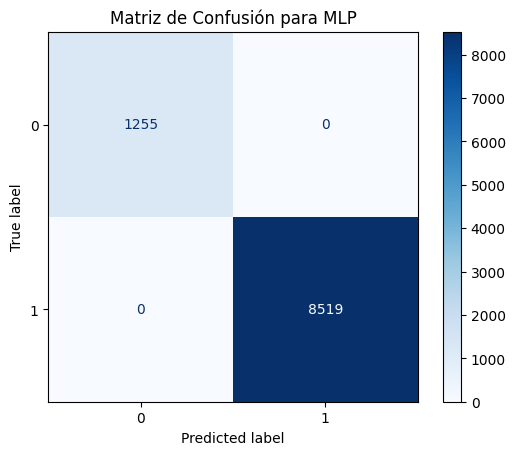

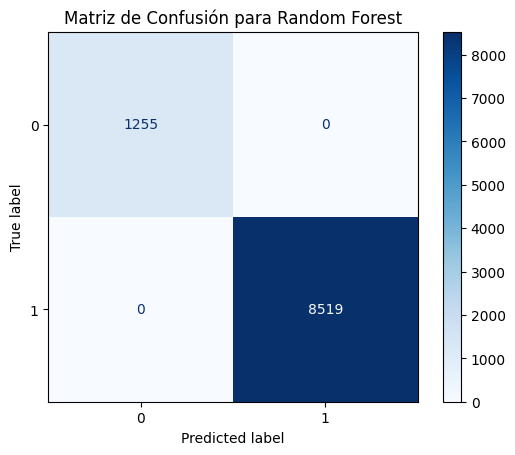

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Mostrar la matriz de confusión para el modelo ajustado
ConfusionMatrixDisplay.from_estimator(mlp, X_test, y_test, cmap='Blues')
plt.title("Matriz de Confusión para MLP")
plt.show()

# Mostrar la matriz de confusión para el RandomForest
ConfusionMatrixDisplay.from_estimator(rf_clf, X_test, y_test, cmap='Blues')
plt.title("Matriz de Confusión para Random Forest")
plt.show()


In [33]:
# Evaluación de MLP
y_pred_mlp = mlp.predict(X_test)
print("Reporte de clasificación para MLP:")
print(classification_report(y_test, y_pred_mlp))

# Evaluación de Random Forest
y_pred_rf = rf_clf.predict(X_test)
print("Reporte de clasificación para Random Forest:")
print(classification_report(y_test, y_pred_rf))


Reporte de clasificación para MLP:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1255
           1       1.00      1.00      1.00      8519

    accuracy                           1.00      9774
   macro avg       1.00      1.00      1.00      9774
weighted avg       1.00      1.00      1.00      9774

Reporte de clasificación para Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1255
           1       1.00      1.00      1.00      8519

    accuracy                           1.00      9774
   macro avg       1.00      1.00      1.00      9774
weighted avg       1.00      1.00      1.00      9774



-------------------------------------------------------------------------------------------------------------------

In [34]:
!pip install tensorflow


ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for tensorflow


In [35]:
import matplotlib.pyplot as plt
from tensorflow import keras

# Supongamos que ya tienes tu modelo compilado y tus datos listos...
history = model.fit(X_train, y_train, 
                    epochs=50, 
                    validation_data=(X_val, y_val),
                    verbose=1)

# Graficar pérdida de entrenamiento y validación
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Evolución de la pérdida')
plt.legend()
plt.grid(True)
plt.show()


ModuleNotFoundError: No module named 'tensorflow'